In [405]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [406]:
# Loading the data

all_data_df = pd.read_excel('alldata.xlsx')

dr_responses_df = pd.read_excel('drdata.xlsx')
dr_questions_df = pd.read_excel('drq.xlsx')

tv2_responses_df = pd.read_excel('tv2data.xlsx')
tv2_questions_df = pd.read_excel('tv2q.xlsx')

elected_candidates_responses_df = pd.read_excel('electeddata.xlsx')


# Exploring data

In [407]:
all_data_df

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [408]:
dr_questions_df.head()

,ID,Title,Question,Info,ArgumentFor,ArgumentAgainst,WordMerger,ID_CandidateQuestionType,Rule,QuestionListData
0,530,KLIMA OG ENERGI,Danmark skal bruge flere penge på at styrke to...,NaN,Den kollektive trafik bør være billig og tilgæ...,Det er dyrt for statskassen at opretholde drif...,0,1,FT,NaN
1,531,ARBEJDSMARKED OG ØKONOMI,Der skal indføres en særlig skat på de allerhø...,NaN,Historisk rammer kriser de fattigste hårdest. ...,Det danske samfund er et af de mest lige samfu...,0,1,FT,NaN
2,533,RET OG STRAF,Kriminalitet begået i udsatte boligområder ska...,NaN,Den mest effektive måde at stoppe bandekrimina...,"Det er urimeligt, at den samme forbrydelse ska...",0,1,FT,NaN
3,534,EU OG UDENRIGS,På sigt skal Danmark meldes ud af EU,NaN,"Så længe Danmark er medlem af EU, kan flertall...",Danmark er bedst tjent med at være en del af E...,0,1,FT,NaN
4,535,EU OG UDENRIGS,"Det er fornuftigt, at Danmark i de kommende år...",NaN,Ruslands angreb på Ukraine har ændret alting o...,Vi er medlemmer af Nato og har i forvejen et s...,0,1,FT,NaN


In [409]:
dr_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,552,553,555,556,557,559,561,563,navn,parti
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,-2,2,2,1,2,2,-2,Lars Philipsen Prahm,Moderaterne
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,1,1,-1,-2,1,2,1,2,Karsten Hønge,Socialistisk Folkeparti
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,2,-1,-2,-1,1,2,2,2,Martin Kelleher-Petersen,Alternativet
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,1,2,-2,2,2,2,2,Nicklas Gjedsig Larsen,Alternativet
4,1,1,-2,2,-2,1,-2,1,2,-2,...,2,-2,-2,-1,1,-2,-1,-2,Tom Gillesberg,Løsgænger


In [410]:
tv2_questions_df.head()

,id,type,header,question,depends
0,bornholm-1,rate,Bornholms Storkreds,Med særligt attraktive vilkår bør staten sikre...,{'selectedArea': 'bornholms storkreds'}
1,bornholm-2,rate,Bornholms Storkreds,"Staten bør sørge for, at flytrafikken til og f...",{'selectedArea': 'bornholms storkreds'}
2,bornholm-3,rate,Bornholms Storkreds,Der skal sættes flere penge af til Forsvarets ...,{'selectedArea': 'bornholms storkreds'}
3,bornholm-4,rate,Bornholms Storkreds,Det skal være lettere at hente udenlandsk arbe...,{'selectedArea': 'bornholms storkreds'}
4,bornholm-5,rate,Bornholms Storkreds,Beslutningen om at etablere en naturnationalpa...,{'selectedArea': 'bornholms storkreds'}


In [411]:
tv2_responses_df.head()

,1a,1b,2a,2b,3a,3b,4a,4b,5a,5b,...,10a,10b,11a,11b,12a,12b,parti,navn,storkreds,alder
0,0,1,1,1,1,-1,0,1,0,0,...,0,2,-1,2,0,0,Venstre,Birthe Tindbæk Bredo,Bornholms Storkreds,63
1,-1,1,0,-1,2,-2,-1,-1,-2,1,...,1,-1,-1,2,1,-1,Venstre,Julie Pauch Nymark,Bornholms Storkreds,27
2,-2,0,0,1,1,-1,0,1,-1,1,...,1,1,-2,2,1,1,Venstre,Peter Juel-Jensen,Bornholms Storkreds,56
3,-2,-1,2,2,2,-2,0,-1,-2,1,...,1,-1,-2,2,2,-2,Dansk Folkeparti,Mette Sode Hansen,Bornholms Storkreds,42
4,-2,-1,1,1,2,-2,1,0,-1,1,...,2,1,-1,2,0,1,Dansk Folkeparti,René Danielsson,Bornholms Storkreds,35


In [412]:
elected_candidates_responses_df.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
1,2,2,-2,-2,-2,-2,2,2,2,-2,...,-2,0,-2,2,1,1,0,-2,Østjyllands Storkreds,58
2,2,2,-2,-1,-1,-1,1,-2,2,-2,...,-2,0,-1,2,0,-2,-1,1,Østjyllands Storkreds,30
3,-1,-1,2,-1,2,-1,-2,1,-2,1,...,-1,-1,0,2,-2,2,0,0,Østjyllands Storkreds,53
4,-1,-1,1,-2,2,1,-2,1,-2,1,...,-1,0,1,1,-2,2,1,-1,Østjyllands Storkreds,46


In [413]:
from pandas.io.formats.info import DataFrameInfo
def get_missing_ratio_info(df: pd.DataFrame) -> pd.DataFrame: 
    info = DataFrameInfo(data = df)
    row_count = df.shape[0]
    info_df = pd.DataFrame(
        {'Non-Null Count': info.non_null_counts, 'Dtype': info.dtypes}
    )

    # Calculating missing data per column. 
    info_df['Missing Count'] = row_count - info_df['Non-Null Count']
    info_df['Missing Ratio'] = (info_df['Missing Count'] / row_count).astype(float)
    return info_df

In [414]:
print(f"rows {all_data_df.shape[0]}, cols {all_data_df.shape[1]}")
all_data_missing_info = get_missing_ratio_info(all_data_df)
print(all_data_missing_info.sort_values(by=['Non-Null Count'], ascending=True))

rows 867, cols 53
           Non-Null Count   Dtype  Missing Count  Missing Ratio
530                   867   int64              0            0.0
1b                    867   int64              0            0.0
2a                    867   int64              0            0.0
2b                    867   int64              0            0.0
3a                    867   int64              0            0.0
3b                    867   int64              0            0.0
4a                    867   int64              0            0.0
4b                    867   int64              0            0.0
5a                    867   int64              0            0.0
5b                    867   int64              0            0.0
6a                    867   int64              0            0.0
6b                    867   int64              0            0.0
7a                    867   int64              0            0.0
7b                    867   int64              0            0.0
8a                    

In [415]:
tv2_missing_info = get_missing_ratio_info(tv2_responses_df)
print(tv2_missing_info.sort_values(by=['Non-Null Count'], ascending=True))

           Non-Null Count   Dtype  Missing Count  Missing Ratio
1a                    962   int64              0            0.0
navn                  962  object              0            0.0
parti                 962  object              0            0.0
12b                   962   int64              0            0.0
12a                   962   int64              0            0.0
11b                   962   int64              0            0.0
11a                   962   int64              0            0.0
10b                   962   int64              0            0.0
10a                   962   int64              0            0.0
9b                    962   int64              0            0.0
9a                    962   int64              0            0.0
8b                    962   int64              0            0.0
8a                    962   int64              0            0.0
7b                    962   int64              0            0.0
7a                    962   int64       

In [416]:
dr_missing_info = get_missing_ratio_info(dr_responses_df)
print(dr_missing_info.sort_values(by=['Non-Null Count'], ascending=True))


       Non-Null Count   Dtype  Missing Count  Missing Ratio
530               904   int64              0            0.0
563               904   int64              0            0.0
561               904   int64              0            0.0
559               904   int64              0            0.0
557               904   int64              0            0.0
556               904   int64              0            0.0
555               904   int64              0            0.0
553               904   int64              0            0.0
552               904   int64              0            0.0
551               904   int64              0            0.0
550               904   int64              0            0.0
548               904   int64              0            0.0
navn              904  object              0            0.0
547               904   int64              0            0.0
545               904   int64              0            0.0
544               904   int64           

We did not find any missing values in any data set

In [417]:
all_data_df

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


# PCA

In [418]:
all_data_df.value_counts()

530  531  533  534  535  537  538  540  541  543  544  545  546  547  548  550  551  552  553  555  556  557  559  561  563  navn               parti                                        1a  1b  2a  2b  3a  3b  4a  4b  5a  5b  6a  6b  7a  7b  8a  8b  9a  9b  10a  10b  11a  11b  12a  12b  storkreds                alder
-2   -2   -2   -2    1    2   -2    1   -2    2   -2    2    2   -2    1   -2   -2    1   -2    2    2   -1    1    2   -2   Kenneth Kirkeby    Liberal Alliance                              0  -1  0    1   1  -2  -1  -2   1  -1   1   1   2   1   1  -1   2  -1   2   -2   -2    2   2    -1   Sydjyllands Storkreds    34       1
 1    2   -1   -2    1   -1    1   -1    1    1   -2    1   -1    1    1    2   -2    2   -1    1   -2    2   -2   -1    1   Lone Larsen        Socialdemokratiet                             1   1  0    0   1   1   1   0   0   0   0   0  -1   1   1   1   1   0  -1    2    1   -2   0     1   Københavns Storkreds     69       1
      1    2   -1    1  

In [419]:
def onehotencode_and_concat_to_original(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    result = pd.concat([original_dataframe, dummies], axis=1)
    result = result.drop([feature_to_encode], axis=1)
    return(result) 

In [420]:
from sklearn.decomposition import PCA

def encode_party_names(all_data_df: pd.DataFrame):
    party_to_encoding_map = {}
    for index, parti in enumerate(all_data_df['parti'].unique()):
        party_to_encoding_map[parti] = index
    return party_to_encoding_map

party_to_encoding_map = encode_party_names(all_data_df)

def get_X_y(all_data_df):
    X = all_data_df.drop(['parti', 'navn'], inplace=False, axis=1)
    y = all_data_df['parti'].apply(lambda x: party_to_encoding_map[x])
    return X,y

X,y = get_X_y(all_data_df)
pca = PCA(n_components=0.95, random_state=4242)
X_decomposed = pca.fit_transform(onehotencode_and_concat_to_original(X, "storkreds"))

In [421]:
pca.explained_variance_ratio_

array([0.68092029, 0.14435069, 0.03484073, 0.01590748, 0.01024004,
       0.00879178, 0.00671333, 0.0058178 , 0.00483302, 0.00452836,
       0.00433605, 0.00396063, 0.00384681, 0.00359667, 0.00337015,
       0.00316751, 0.0030596 , 0.00297009, 0.00281441, 0.00260198])

In [422]:
pca.components_[0]

array([ 9.59415157e-03,  9.94638752e-03, -1.38876352e-02,  7.03525818e-05,
       -1.23451236e-02, -4.24119629e-04,  8.27818234e-03, -7.21829886e-03,
        1.34608803e-02, -7.98126127e-03,  1.93333741e-02, -9.39253193e-04,
        2.02022093e-03, -5.95041238e-03, -3.61568468e-05,  5.17927363e-03,
       -9.38656947e-03,  5.90776533e-03, -1.58067696e-02, -1.14282374e-02,
        2.66666056e-03,  3.90434835e-03,  4.61412794e-03,  1.68766078e-02,
        5.20517263e-03,  9.87965262e-03,  9.11516096e-03,  4.18881812e-03,
       -9.88349671e-03, -1.03588505e-02,  5.58667036e-03, -4.88114071e-04,
        6.99106742e-04,  2.27037159e-03, -3.31906271e-03,  1.15341758e-02,
       -1.08997105e-02,  4.48342423e-03, -1.67713813e-03,  6.09171678e-03,
        2.75682160e-03, -5.27142097e-03,  5.65475121e-03, -2.44649063e-03,
       -4.65296912e-03,  2.94266966e-03, -1.53912398e-03, -2.32535662e-03,
       -4.89870844e-03, -9.98445361e-01, -1.47569543e-04,  1.44894126e-03,
        4.69417073e-04,  

In [423]:
y

0       0
1       1
2       2
3       2
4       3
       ..
862    14
863    14
864    14
865    14
866    14
Name: parti, Length: 867, dtype: int64

In [424]:
X_decomposed[:,0]

array([-3.42447515e+01, -1.97995060e+01,  7.15563411e+00,  1.60640139e+01,
       -1.39534165e+01, -3.82085635e+00,  1.89940786e+01, -2.75342494e+00,
       -2.01915083e+00, -1.08343582e+01, -3.84515634e+00, -1.18339291e+01,
       -1.27229387e+01,  4.41824233e+01, -7.80886941e+00,  2.31879008e+01,
        2.32684555e+01, -1.37079510e+01,  2.32235798e+01,  2.52105934e+01,
        1.62890154e+01, -1.57116216e+01, -2.36935195e+01,  9.31083574e+00,
        1.10995530e+01,  1.42700623e+01, -4.39592152e+00,  2.52798955e+01,
       -1.65040607e+01, -1.34617629e+01, -9.45079297e+00, -4.98019965e-01,
        2.73101920e+00, -1.91861824e+01, -2.39480868e+00,  2.67069760e+00,
        1.37250394e+01, -8.37478772e+00, -2.49953200e+00, -2.87109587e-01,
       -5.33438324e+00, -6.33957825e+00,  1.70878503e+01,  1.12490996e+01,
        1.12794728e+01,  2.25620487e+00, -2.24874802e+01,  1.55680676e+01,
       -2.69352864e+00,  8.53328141e+00, -3.87725386e-01, -1.23576857e+01,
        2.25961722e+01, -

In [425]:
# Party to y value mappings
party_to_encoding_map

{'Moderaterne': 0,
 'Socialistisk Folkeparti': 1,
 'Alternativet': 2,
 'Løsgænger': 3,
 'Enhedslisten': 4,
 'Danmarksdemokraterne': 5,
 'Venstre': 6,
 'Frie Grønne, Danmarks Nye Venstrefløjsparti': 7,
 'Dansk Folkeparti': 8,
 'Kristendemokraterne': 9,
 'Liberal Alliance': 10,
 'Nye Borgerlige': 11,
 'Det Konservative Folkeparti': 12,
 'Radikale Venstre': 13,
 'Socialdemokratiet': 14}

In [426]:
def scale_rgba(rgba_tuple):
    processed = []
    for val in rgba_tuple:
        processed.append(val / 255)
    return (processed[0], processed[1], processed[2], processed[3])

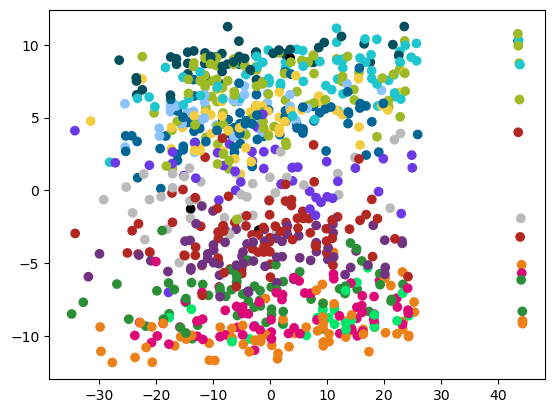

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 

In [427]:
# First we try without scaling
import matplotlib

%matplotlib inline
# viridis = cm.get_cmap('viridis', 14)
# viridis = matplotlib.colormaps["viridis"]
# colors = [viridis(stuff[idx-1]) for idx in y]-
def plot_pca(pca_results):
    colors = [(109,56,229,255),(221,8,120,255),(43,143,56,255),(1,1,1,255),(236,129,25,255),(138,194,254,255),(0,102,151,255),(0,231,107,255),(243,205,65,255),(186,186,186,255),(32,198,206,255),(4,79,93,255),(158,186,39,255),(113,51,129,255),(179,39,34,255)]
    colors = [scale_rgba(x) for x in colors]
    colors = [colors[idx] for idx in y]
    # We reverse the Y axis, to make the partys be placed correctly on their value politics
    plt.scatter(pca_results[:, 0], -1 * pca_results[:, 1], c=colors, alpha=1)
    plt.show()

    print(colors)
# The grouping is not so prevelant
plot_pca(X_decomposed)

In [428]:
X.columns

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', '1a', '1b', '2a', '2b', '3a', '3b',
       '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a', '8b', '9a', '9b',
       '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds', 'alder'],
      dtype='object')

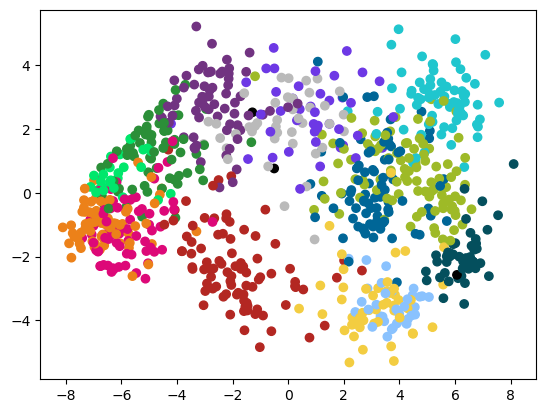

[(0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.8666666666666667, 0.03137254901960784, 0.47058823529411764, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.42745098039215684, 0.2196078431372549, 0.8980392156862745, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.00392156862745098, 0.00392156862745098, 0.00392156862745098, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 0.2196078431372549, 1.0), (0.16862745098039217, 0.5607843137254902, 

In [429]:
# Now we try with scaled data. We will use Standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X,y = get_X_y(all_data_df)

X_temp = X.drop('storkreds', axis=1, inplace=False)
X_temp[:] = scaler.fit_transform(X_temp[:])
X_temp['storkreds'] = X['storkreds']
X_scaled = onehotencode_and_concat_to_original(X_temp, 'storkreds')
pca = PCA(n_components=0.95)
X_decomposed = pca.fit_transform(X_scaled)

# The grouping is more prevalent now
plot_pca(X_decomposed)

# analysis/description of which questions are most crucial concerning their placement on the axes.

In [430]:
X_pc = X_decomposed

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = X.columns
# get the names
# Map each feature index to their name
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
# Map each most important feature to the PCA they were the most important in. 
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [431]:
df

,0,1
0,PC0,530
1,PC1,10b
2,PC2,534
3,PC3,5b
4,PC4,547
5,PC5,storkreds
6,PC6,storkreds
7,PC7,12a
8,PC8,9b
9,PC9,552


In [432]:
df['feature_names']= df.loc[:,1]
df['principle_component'] = df.loc[:,0]

In [436]:
all_questions_df = pd.DataFrame()

all_ids = dr_questions_df["ID"].apply(lambda x: str(x)).append(tv2_questions_df['id'])
all_questions = dr_questions_df['Question'].append(tv2_questions_df['question'])
all_questions_df['ID'] = all_ids
all_questions_df['Question'] = all_questions
# all_questions_df = all_questions_df.concat({
#     'ID': all_ids,
#     'Question': all_questions,
# })

C:\Users\Bruger\AppData\Local\Temp\ipykernel_21188\3378337951.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_ids = dr_questions_df["ID"].apply(lambda x: str(x)).append(tv2_questions_df['id'])
C:\Users\Bruger\AppData\Local\Temp\ipykernel_21188\3378337951.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_questions = dr_questions_df['Question'].append(tv2_questions_df['question'])


In [452]:
# When we plotted the parties, we used PC0 as the x-axis and PC1 (* -1) as the y-axis.
# The result of the plot looked like similar to plots of political parties where 
# position on the x-axis indicates where the party is placed according to their distribution politics / economics
# while the y-axis indicates where the party is placed according to their value politics / socio-cultural

# Most important question for left-right placement on the political graph
most_important_distribution_politics_placement_question = all_questions_df[all_questions_df["ID"] == df['feature_names'].iloc[0]]['Question'].values[0]

# Most important question for high-low placement on the political graph
most_important_value_politics_placement_question = all_questions_df[all_questions_df["ID"] == df['feature_names'].iloc[1]]['Question'].values[0]

In [455]:
print(f"Most important question for left-right placement: {most_important_distribution_politics_placement_question}")
print(f"Most important question for high-low placement: {most_important_value_politics_placement_question}")

Most important question for left-right placement: Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje
Most important question for high-low placement: Den såkaldte Arne-pension, der giver mulighed for tidligere pension, skal bibeholdes, selvom der er mangel på arbejdskraft.


In [459]:
X

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
864,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [465]:
X['530'].mean()

0.37831603229527105